# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [13, 187, 433]
#75 75, 86, 95, 135,  300, 400, 

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,21217,6208,14982,3095,6707,602
1,2438,8002,9819,6269,3459,3
2,1982,3218,1493,1541,356,1449


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Frozen: 3071.93
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

1. **The first sample that I have chosen has following values.**


* Annual Spending on Fresh - 21217 Monetary Units 
* Annual Spending on Milk - 6208 Monetary Units
* Annual Spending on Grocery - 14982 Monetary Units 
* Annual Spending on Frozen - 3095 Monetary Units 
* Annual Spending on Detergent Paper - 6707 Monetary Units 
* Annual Spending on Delicatessen - 602 Monetary Units 

This sample can represent that it is a establishment of **Super Market** because we can see that if we talk about Fresh Products Annual Spending it is more that the average spending on all the customers on Fresh Products . Same is true of Milk, Grocery, Frozen and Detergent Paper . Thus we conclude that for products like Fresh , Milk , Grocery, Frozen and Detergent Paper the Annual Spending is more that their avearge spending . We also know that a super market is a large shop which sells household items , food and milk products . So the annual spending for super market on Fresh, Milk , Grocery , Frozen, Detergent Paper is more as there are large number of people that approach a super market for all these needs . Also we know that there is a less than average spending on Delicatessen which is only 602 Monetary Units compared to an average which is 1524 monetary units because since we know that delicatessen are products which includes cooked meat, cheese , wine from another country so there might be a factor that since the super market need to arrange this from another country due to tedious procedure of arranging delicatessen there is less stock for the same and also cooked meat does not make much sense to store in stock as people prefer to purchase fresh so they invest only the amount on this which is ensured to be selled the same day . 


2. **The second sample that I have chosen has following values : -** 


* Annual Spending on Fresh - 2438  Monetary Units 
* Annual Spending on Milk - 8002 Monetary Units
* Annual Spending on Grocery - 9819 Monetary Units 
* Annual Spending on Frozen - 6269 Monetary Units 
* Annual Spending on Detergent Paper - 3459	 Monetary Units 
* Annual Spending on Delicatessen - 3 Monetary Units 


This sample can represent that it is a establishment of **Vegetarian Restaurant** because we can see that the restaurant spends less on the  delicatessen product that is it spends the minimum on delicatessen products . Delicatessen Products include products like Cooked Meat, Cheese and Wine . Since the restaurant is not serving non veg and wine so there are no chances on spendings here . However the small percentage where the restaurant is investing 3 monetary unit on delicatessen product might include cheese products etc. which are used in veg recipes too . Since the restaurant serves milk shakes and ice - creams it spends more than average on milk products that is it spends 8002 monetary Units which is more than average that is 5796.2 monetary units . Since it is restaurant it serves food and hence involves consumption of groceries and hence it spends 9819 monetary units on grocery which is more than average of groceries . Since it is a restaurant it keep storage of frozen products like ice creams, some vegetables and also packaged frozen food and also stores seasonless frozen vegetables. So it spends more than average on frozen products as well . Since it is a running restaurant and there are people who consume food at the restaurant only this involves consumption of detergent as after consuming food they wash hands . Also there are dishes which are washed at restaurants only , also the cleaning of restaurant using phenyl involves consumption of detergent so it spends more than average on detergent . Also since it is not a super market we can see that the rates are not exceptionally close to a super market rate that is the rates of each of these are higher in some fraction from average but not exceptionally higher . 

3. **The third sample that I have chosen has following values : -** 


* Annual Spending on Fresh - 1982 Monetary Units 
* Annual Spending on Milk - 3218 Monetary Units
* Annual Spending on Grocery - 1493 Monetary Units 
* Annual Spending on Frozen - 1541 Monetary Units 
* Annual Spending on Detergent Paper - 356	 Monetary Units 
* Annual Spending on Delicatessen - 1449 Monetary Units 

This sample can represent that it is a establishment of **Coffee Shop** because we can see that it spends more annual expenditure on Milk compared to other products like Fresh, Grocery, Frozen, Detergent Paper and Delicatessen so we can say that it is a coffee shop as it spends more on Milk products and as serving coffee involves consumption of milk .  


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy().drop('Grocery', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)


0.681884008544


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* I attempted to predict **Grocery** . 

* The reported Prediction Score is 0.6818 

* No, this feature is necessary for identifying customers spending habits . We are saying so because the prediction score or coefficient of determination R^2 is closer to 1 as compared to 0. It is 0.6818 which is approximately 0.7 and hence it is considered to be a good score. Hence we can say that it was easy to predict it using other features , so it is actually not an important feature which will contribute in the prediction of some other feature . While other features will contribute in its prediction . And other features will predict the spending habit of Grocery or whether he will buy Grocery or not. Hence we need not include Grocery in the features . Hence Grocery is not a relevant feature . 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


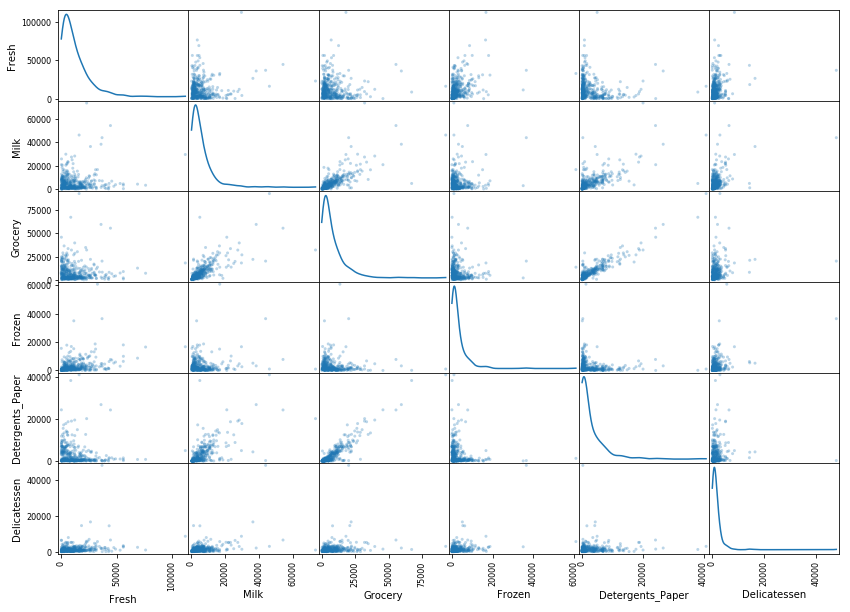

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');


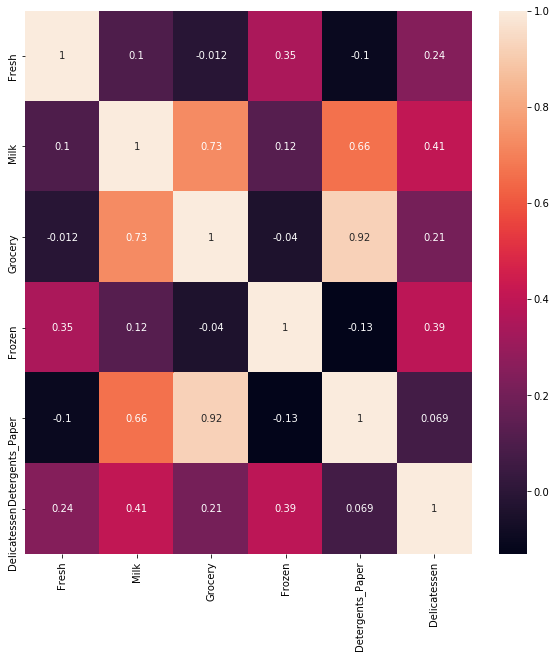

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Using this scatter matrix as a reference, we can say that the data is skewed more towards 0 that is towards the origin . Also we can see that in each of these graphs some points are far away from 0 and also from highest areas of density of points . Those points are noise in the data and hence are called outliers . 

* Yes there are pairs in the features which exhibit some degree of correlations . Such pairs of features are the following : - 

    **a) Grocery and Detergent_Paper** - the correlation is 0.92 that is they are highly correlated . So if we increase the annual expenditure on Grocery , the annual expenditure on Detergent Paper will also increase and vice versa .  

    **b) Milk and Grocery** - the correlation is 0.73 that is they are correlated but less the grocery and detergent paper . If we increase the annual expenditure in monetary units on Milk, the annual expenditure on grocery will also increase and vice versa . 

    **c) Milk and Detergent Paper** - the correlation is 0.66 that is they are correlated but less than Milk and Grocery Pairs .If we increase the annual expenditure in monetary units on Milk, the annual expenditure in Monetary units on detergent paper will also increase . 


* This confirms my suspicions about the relevance of the feature 'Grocery' we attempted to predict because we can see that Grocery is Correlated with Detergent Paper with a correlation of 0.92 as per heatmap . Also Grocery is correlated to milk with a correlation of 0.73 as per heatmap. Thus we can say that Grocery is correlated with more that one feature out of the six features available . Hence we made a suspicions that it need not be an important feature as it can be predicted using other features is true . 


* We can see that in the scatter matrix the diagonal positions represent kernel Density Estimation and all the graphs in the diagonal position represent that the data is skewed towards origin . The density is very high at the origin and as we move ahead the density reduced drastically and hence eventually becomes negligible . 



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


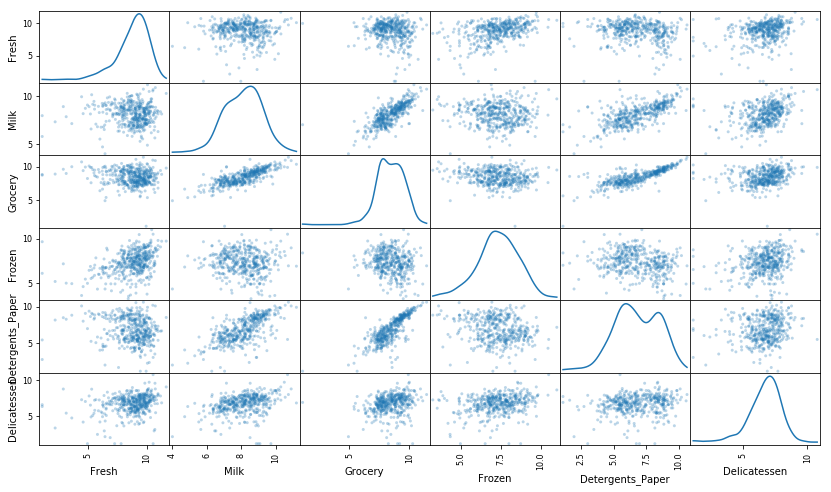

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.962558,8.733594,9.614605,8.037543,8.810907,6.400257
1,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
2,7.591862,8.076515,7.308543,7.340187,5.874931,7.278629


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
print(log_data.keys())
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Yes, There are data points which are considered outliers for more than one feature based on the definition above . Those data points are 65, 66, 75, 128, 154 . Data point 65 is present in two features Fresh and Frozen . Data point 66 is present in two features Fresh and Delicatessen . Data point 75 is present in 2 features Grocery and Detergent Paper . Data point 128 is present in two features Fresh and Delicatessen . Data point 154 is present in three features Milk, Grocery and Delicatessen . 

* Yes these data points should be removed from the dataset . 

* Yes all of the above data points 65, 66, 75, 128, 154 are added to the outliers list to be removed because all these points are present more than one feature . We take into consideration the reason that the data point should be detected in multiple categories as outliers because  if this happens then there are more chances the point is a result of some error by machine or manual recording of other entry . Otherwise the outlier can also be because of the variance in the dataset . We don't want to discard such points which are not mistakes and are determining variance in our dataset . **Also if consider all the outliers obtainned by each feature, it would map to 10% of the data and hence would cause greater information loss, that is why we choose to remove only the ones which appear as outliers in multiple features.**  Also we are only picking outliers which are present in multiple features because if we remove all the outliers our data will not even appear like a normal distribution and hence we would also cause information loss to our data in terms of variance .  From the perspective of K-Means CLustering Algorithm I can say that if there outliers detected in K-Means clustering then it can cause lot of displacement in the position of centroid of the cluster and hence it can cause deformation in the shape of the cluster .

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

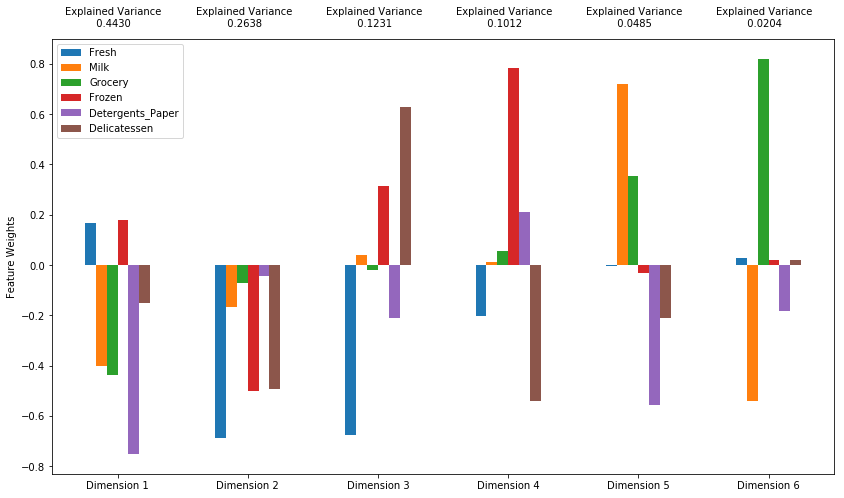

In [10]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)



In [11]:
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* The variance explained in data by the first and the second principal component is 0.44302505 and 0.26379218 respectively . The total variance explainned by the first and second principal component is the sum of the variance of the first principal component and second principal component that is 0.44302505 + 0.26379218 and it equals to 0.70681723 . 

So total variance by first and second principal component is 0.70681723 . 

* The variance in the data explained by the first four principal components is 0.44302505 , 0.26379218, 0.1230638 and 0.10120908 . 


* In the visualization shown above we can see that we have correlation of each individual feature with each principal component . If the feature is positively weighted, it means that the feature and principal component are directly proportional to each other . That is if we increase the value of feature, the principal component will also increase . Also if we decrease the value of feature the principal component will also decrease . Also the magnitude in the positive value justify how strongly correlated is the feature with the principal component. Also if the feature is negatively weighted we can see that the principal component and the feature are inversely proportional . That is if the feature decreases the principal component increases . 

The cumulative variance of all the dimensions are as follows (refer cell 11 above) : 

The cumulative variance for dimension 1 is 0.4430
The cumulative variance for dimension 2 is 0.7068
The cumulative variance for dimension 3 is 0.8299
The cumulative variance for dimension 4 is 0.9311
The cumulative variance for dimension 5 is 0.9796
The cumulative variance for dimension 6 is 1.0000


**Discussion on the first four dimensions best representation in terms of customer spending habits**:-

Yes, now I got the fact that while the absolute signs of features don’t matter, the relative signs between the individual features do matter . 

* **Spending on First Dimension** We can see from the graph above that Dimension 1 has maximum spending on Detergents_Paper and also on Grocery and Frozen Products . But the spending on Grocery and Frozen Products is less than that on Detergents_Paper .

* **Spending on Second Dimension** We can see from the graph above that Dimension 2 has Maximum spending on Fresh Products . We can also see from here that the least is spent on detergent paper . 

* **Spending on Third Dimension** We can expect a datapoint in Dimension 3 to be relatively high spending in delicatessen while spending low on Fresh Products.  

* **Spending on Fourth Dimension** We can expect a datapoint in Dimension 4 to be relatively high spending in Frozen Product while spending low on Delicatessen . However the spending on Delicatessen is less than the spending on Frozen Products .



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8891,-1.3001,-1.1945,0.9689,-0.2426,0.2970
1,-0.7503,2.4661,-2.6802,4.6815,1.2507,-0.2193
2,0.9382,0.6387,1.3840,-0.3231,-0.0505,-0.7708


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.8891,-1.3001
1,-0.7503,2.4661
2,0.9382,0.6387


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

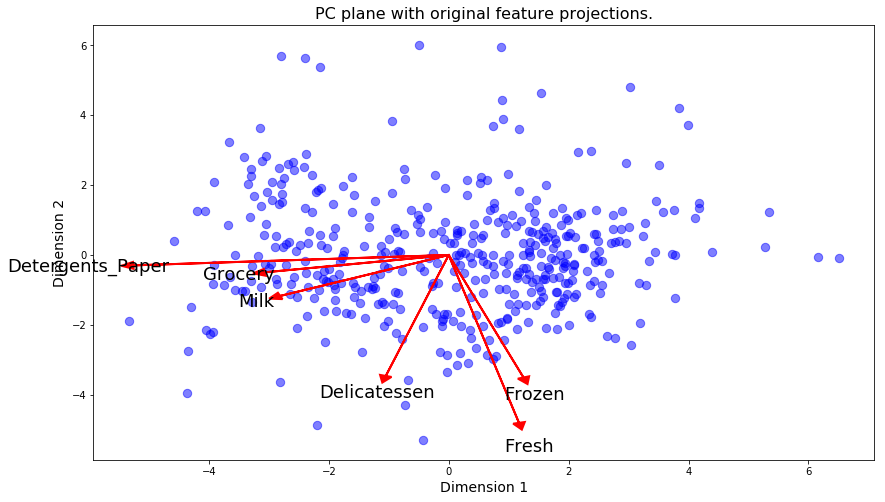

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **The advantages of using K-Means Clustering Algorithm :-**



1. If we have a large number of variables K-Means is computationally faster than other clustering methods like heirarchical clustering etc . Thus we can say that it is efficient even with larger data . 

2. K-Means Algorithm is easy to implement . 

3. K-Means Algorithm Produce tighter cluster with globular datasets compared to heirarchical clustering . 

4. It is easy to interpretate the clustering results .


* **The advantages of using Gaussian Mixture Model Clustering Algorithm:-**


1. Gaussian Mixture Model Clustering Algorithm is an example of Soft Clustering . Soft Clustering is when a data point belongs to each cluster in our scenario but with different membership . Example:- It can be useful in cases where we want to classify the document into multiple cluster meaning a document can belong to various topics and sub topics and hence can belong to multiple clusters . 

2. As Gaussian Mixture Model Clustering Algorithm is based on the fundas of sample membership among multiple clusters as a advantage of that it provides shape flexibility . 



* **After analysing my observations about the wholesale customer data , I would prefer to use Gaussian Mixture Model Clustering Algorithm with this dataset because** 
we can see from the biplot graph drawn above that the data is normally distributed and also we cannot see any clear formations of cluster which tend to be circular and as we know that it is difficult for K-Means to detect all shapes clusters and it is more likely to detect circular shapes . Also as the data is normally distributed a clustering algorithm which follows soft clustering (that is the funda of membership of a data point in multiple clusters) is more likely to be preferred . Since the Gaussian Mixture Model is based on soft clustering , it is likely to be preferred in this scenario . Also as we are not sure about the shape of the clusters by looking at the biplot graph so as Gaussian Mixture Model Provides shape flexibility we are going to use it . 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

0.422324682646


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
 
* Silhouette Score for the several cluster Number I have tried are :-


1. For 2 Clusters - 0.421916846463
2. For 3 Clusters - 0.404248738241
3. For 4 Clusters - 0.301212353811
4. For 5 Clusters - 0.283832367979
5. For 6 Clusters - 0.29939507011
6. For 7 Clusters - 0.330323052068
7. For 8 Clusters - 0.299481079605
8. For 9 Clusters - 0.331777454577



* Out of all the cases of clusters we have tried , the case with two number of clusters have the best silhouette score . That is For 2 clusters we have 0.421916846463 silhouette score . 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

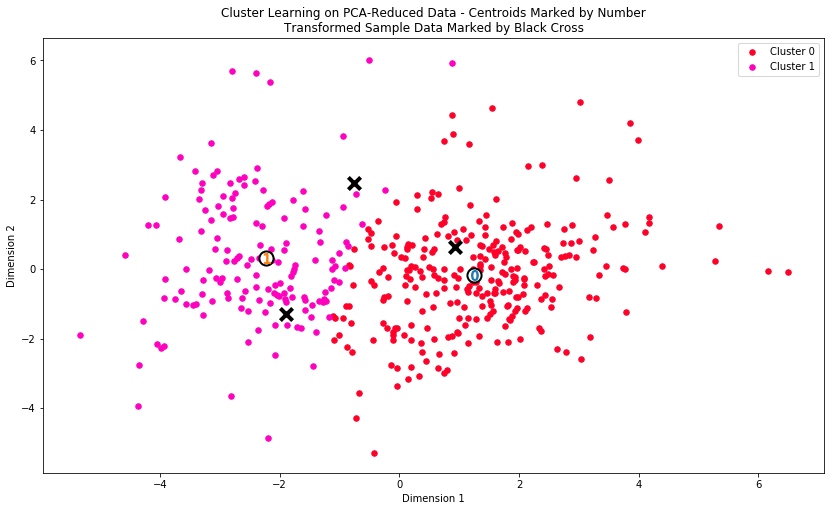

In [17]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

**Segment 0** can be considered to be a **Market/Department Store** because we can see that it has consistent purchase around milk grocery and frozen products and it also has low fresh products than average as it is departmental store or market it is more likely to keep products in stock and hence it is less likely to have fresh products . 

**Segment 1** can be considered to be a **Restaurant** because it is spending more on grocery compared to milk . Also it is spending more than average on milk, Grocery and Detergent Paper . So as there are more customers that walk in into the restaurant everyday and have food , they wash their hand and consume detergent, also floor sweeping at restaurant and washroom cleaning consume detergent and also the dishes are washed at restaurant which consume detergent. Hence we can see the consumption of detergent is more than average because it is highly used in the restaurant . Also milk is used more than average because the restaurant person serves tea, coffee and milk shakes to people coming . 



### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

* Sample Point 0 Represents A Market/Department Store

  Sample Point 1 Represents A Market/Department Store
  
  Sample Point 2 Represents A Restaurant . 
  
  
*  Yes this is consistent with the predictions obtainned from clusters . 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Yes, Companies do often run A/B tests when making small changes to their Products or Services to determine whether making that change will affect its Customers Positively Or Negatively .

As we have two segments or clusters, one belong to a market/department store that is segment 0 and other belong to a restaurant that is segment 1 . Based on intuitions we can say so :- 

1. We can say that a **restaurant segment (that is segment 1)** will be **negatively affected** by changing the delivery service from **5 days a week** to **3 days a week** because then there will be less fresh product served to him and this will reduce the quality of his food, also people would rate him with lower reviews on apps which will reduce his future sales so he will be more concerned and negatively affected by the decision made for a 3 day delivery option . Also if decide to provide the person with only 3 days delivery, we are somewhere planning that the restaurant will expect us to deliver 5 days product in 3 days(that is more product) and hence now the person will also be needing to even keep some of these extra products into storage and we know that the restaurant won't be having much extra storage so storage will again be a next concern for him . 

2. We can say that **a department store (that is segment 0)** will not be affected too much by changing the delivery service from **5 days a week to a 3 days a week** because the deparment store has storage space so he can keep the food stored . Also the department store does not need much of the fresh products as it can keep stored in refrigerators . 


What we have wrote above is just an intuition or what we made from the understanding by looking at the clusters and analysing them . However by working on so many ML Submissions till now , we are all aware that intuitions may or may be true . Therefore Companies on the other hand will undergo A/B testing before bringing conclusions from 1 and 2 into practice .  

A) To do that companies will Take two groups to named (G1, G2) of 10% (this is just 10% for this example, it is basically a sample we are taking to perform the test . 10% can be varied . )data each from Cluster with Segment 0 that is a department Store . 

B) Next the company will take out two Groups to be Named (G3, G4) of 10% data each from Cluster with Segment 1 that is Restaurant Segment . 

Now we will run the experiment of 
a) Delivery of 5 days a Week (that is the current delivery option used till date and is the Control Group Of A/B testing)

b) Delivery of 3 days a Week (that is the change in delivery Option and is the Treatment Group of A/B testing)

We will run both these set of experiments each on Sample From Cluster with Segment 0 and Cluster will Segment 1 . 

Thus we can say that Group G1 of Cluster with Segment 0 will have Delivery Option of 5 days a week that is Control Group of A/B testing . 

Group G2 of Cluster Segment 0 will have Delivery Option Of 3 Days a Week that is Treatment Group Of A/B testing . 

Group G3 of Cluster Segment 1 will have delivery option of 5 days a Week that is Control Group Of A/B testing . 

Group G4 of Cluster Segement 1 will have delivery option of 3 Days a week that is Treatment Group Of A/B testing . 

We will then analyse the satisfaction level of each of these groups with the change in delivery option . So if Group G2 of cluster segment 0 is okay with 3 days a week delivery we will choose to serve the entire segment 0 with the same delivery option . That is how companies do A/B testing . 





### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesale distributor would apply supervised learning algorithm(Decision Trees or Support Vector Machines or Random Forest etc . ) on the old dataset with datapoints of Fresh, Milk, Grocery, Frozen, Detergent_Paper, Delicatessen as inputs and we can say that Customer Segment whose values are 0 or 1 as detected in Gaussian Mixture Model  as Target Variable . We know that Customer Segment 0 belongs to a department store and would be okay with 3 days delivery a week and that Customer Segment 1 belong Restaurant and would be negatively affected by the change of 3 days delivery a week . 

1. **Training the supervised learning model** - So the wholesale distributor will train all the old points on a supervised learning model will datapoints as input and customer segments as target variable . Then on this model he will predict the 10 new customers who got into the system . 

2. **Predicting on the supervised model trained above** If the prediction made is 0 for any given point out of the new 10 customers then we will provide him delivery for 3 days a week as segment 0 is a department store . If the prediction made for any given point out of the new 10 customers is 1, we will keep delivery for 5 days a week because we know that segment 1 is a restaurant and will be  negatively affected by delivery of 3 days a week . 

3. **Deriving best delivery option conclusions based on prediction** - Prediction 1 will have 5 days a week . Prediction 0 will have 3 days a week . 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

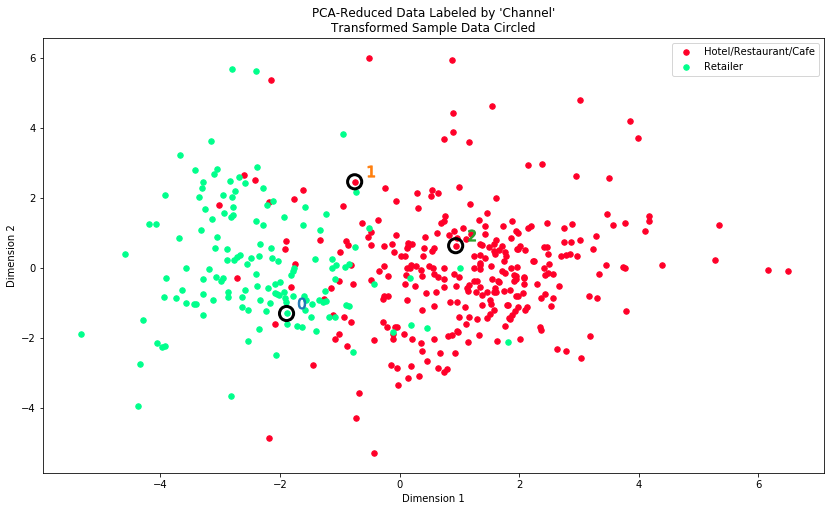

In [20]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* After the introduction of channels as another feature we can see that the clustering algorithm and the number of clusters you have chosen are highly comparable as the two clusters still look quite the same . 

* Yes there are customer segments which can be purely classified as 'Retailers' or 'Hotels/Cafes/Restaurants'there are two customers segments classified as 0 or 1 . As we have mentionned in question 10 that customer segment 0 is market/department store and hence can be called as Retailer and Customer Segment 1 belongs to a Restaurant and hence belongs to 'Hotels/Restaurants/Cafes' . 

* Yes I would consider these classifications as consistent with your previous definition of the customer segments . 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.